<h1>Digit classification</h1>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [6]:
class neural_network:
    
    def __init__(self,ni,nh,no,activation,lr,ll):
        self.ni = ni
        self.nh = nh
        self.no = no
        self.lr = lr
        self.activation = activation
        self.reg = ll
        
        np.random.seed(0)
        self.wh = np.random.normal(0, 1, (self.nh, self.ni))/np.sqrt(ni)
        self.bh=np.zeros((self.nh,1))
        self.wo = np.random.normal(0, 1, (self.no, self.nh))/np.sqrt(nh)
        self.bo=np.zeros((self.no,1))
        
        if activation=='sigmoid':
            self.nonlin= lambda x: 1/(1+np.exp(-x))
            self.dnonlin= lambda x: 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
        elif activation=='tanh':
            self.nonlin= lambda x: np.tanh(x)
            self.dnonlin= lambda x: 1/np.cosh(x)**2
        else:
            self.nonlin=lambda x: np.maximum(x, 0, x)
            self.dnonlin=lambda x: np.ones(x.shape)*(x>0)
        
        pass

    def loss(self,y,pred):
        return np.sum(np.nan_to_num(-y*np.log(pred)))+self.reg/2*(np.sum(self.wh[:]**2)+np.sum(self.wo[:]**2))

    @staticmethod
    def softmax(z):
        sm=np.sum(np.exp(z))
        return np.exp(z)/sm
    
    def predict(self,x):
        x=np.array(x,ndmin=2).T
        a1=self.nonlin(np.dot(self.wh,x)+self.bh)
        a2=np.dot(self.wo,a1)+self.bo
        o2=self.softmax(a2)
        return o2

    
    def score(self,X,y):
        score_lst=[]
        for i in range(y.shape[1]):
            pred=np.argmax(self.predict(X[:,i]))
            yv=np.argmax(y[:,i])
            score_lst.append(np.int(pred==yv))

        print('accuracy: ', np.sum(score_lst)/len(score_lst))        
        # return list of scores
        return score_lst

    def train(self,X,y):

        #train using the whole training sample
        batch_size = 1 #X.shape[1]
    
        #number of times to go over the training data
        epochs=200

        loss_lst=[]
        print('training network with ' + self.activation + ' activation:')
        for i in range(epochs):
            ls=0
            m=0  
            gradwh=0
            gradwo=0
            gradbh=0
            gradbo=0
            
            for (xi,yi) in zip(X.T,y.T):    
                m+=1
                xi=np.array(xi,ndmin=2).T
                yi=np.array(yi,ndmin=2).T
                #input into hidden layer
                zh=np.dot(self.wh,xi)+self.bh
                #hidden layer activations
                ah=self.nonlin(zh)
                #input into output layer
                zo=np.dot(self.wo,ah)+self.bo
                #output layer
            
                #ao=self.nonlin(zo)        
                ao=self.softmax(zo)

                #output layer error - difference with true label y
                err=(ao-yi)
            
                ls+=(self.loss(yi,ao))
                
                delo = err
                
                delh=(self.wo.T.dot(delo))*self.dnonlin(zh)

                gradwh+=np.dot(delh,xi.T)
                gradwo+=np.dot(delo,ah.T)
                gradbh+=delh
                gradbo+=delo
                
                minibatch=10
                if m%minibatch==0:
                    #weights update
                    self.wh-=self.lr*(gradwh)/minibatch+self.lr*self.reg*self.wh
                    self.wo-=self.lr*(gradwo)/minibatch+self.lr*self.reg*self.wo

                    #biases update
                    self.bh-=self.lr*gradbh/minibatch
                    self.bo-=self.lr*gradbo/minibatch
                    
                    gradwh=0
                    gradwo=0
                    gradbh=0
                    gradbo=0
            
            loss_lst.append(ls)
            if (i%10==0):
                print('epoch: ',i,', loss: ',ls)

        plt.plot(loss_lst) 
        plt.show()
        
        pass

In [7]:
train_file = open("mnist_train.csv", 'r')
train_set = train_file.readlines()
train_file.close()

test_file = open("mnist_test.csv", 'r')
test_set = test_file.readlines()
test_file.close()

In [8]:
#create random indices for the training and validation set from the training set
nums=np.arange(0,20000)
np.random.shuffle(nums)
rand_train_ind = nums[:18000]
rand_val_ind = nums[18000:]

In [9]:
def preproc(data):
    
    labels=np.empty([10,1])
    vals=np.empty([784,1])

    i=0
    for p in data:
        i+=1
        if (i%1000==0):
            print(i) 
        data=np.asfarray(p.split(','))
        y=int(data[0])
        lab=np.zeros((10,1))
        lab[y]=1
        labels=np.hstack((labels,lab))
        img=np.array(data[1:],ndmin=2).reshape(784,1)/255.0
        vals=np.hstack((vals,img))

    vals=vals[:,1:]
    labels=labels[:,1:]
    
    return (vals, labels)

In [10]:
rand_train = [train_set[i] for i in rand_train_ind]
rand_val = [train_set[i] for i in rand_val_ind]

(x_train,y_train) = preproc(rand_train)
(x_val,y_val) = preproc(rand_val)

(x_test,y_test) = preproc(test_set)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
1000
2000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [12]:
nn1=neural_network(784,100,10,'relu',0.1,0.002)

training network with relu activation:
epoch:  0 , loss:  9408.25257833
epoch:  10 , loss:  4440.39945997
epoch:  20 , loss:  4333.96701063
epoch:  30 , loss:  4277.59876745
epoch:  40 , loss:  4244.73716297
epoch:  50 , loss:  4234.4720515
epoch:  60 , loss:  4224.44056598
epoch:  70 , loss:  4213.89872276
epoch:  80 , loss:  4206.53568999
epoch:  90 , loss:  4195.75618751
epoch:  100 , loss:  4192.46048788
epoch:  110 , loss:  4193.168517
epoch:  120 , loss:  4183.1714839
epoch:  130 , loss:  4178.7188555
epoch:  140 , loss:  4177.35391609
epoch:  150 , loss:  4173.00837802
epoch:  160 , loss:  4175.69934598
epoch:  170 , loss:  4172.88872587
epoch:  180 , loss:  4177.35118544
epoch:  190 , loss:  4173.31381838


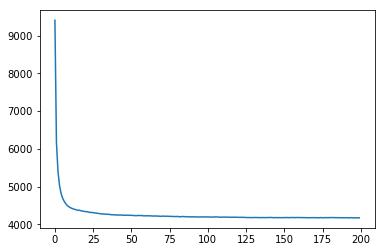

In [13]:
nn1.train(x_train,y_train)

In [17]:
print('train set:') 
train_score=nn1.score(x_train,y_train)
print('validation set:') 
val_score=nn1.score(x_val,y_val)
print('test set:') 
test_score=nn1.score(x_test,y_test)

train set:
accuracy:  0.983166666667
validation set:
accuracy:  0.963
test set:
accuracy:  0.9649


In [43]:
correct=[i for i in range(len(test_score)) if test_score[i]==1]
wrong=[i for i in range(len(test_score)) if test_score[i]==0]

In [35]:
wrong[:5]

[8, 77, 124, 247, 259]

In [48]:
correct[:5]

[0, 1, 2, 3, 4]

In [71]:
np.argmax(y_test[:,0])

7

In [72]:
np.argmax(nn1.predict(np.array(x_test[:,0],ndmin=2).T))

7

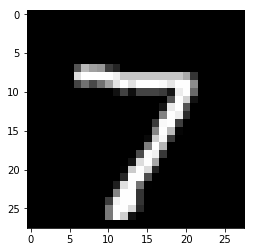

In [73]:
plt.imshow(x_test[:,0].reshape(28,28),cmap='gray',interpolation=None);

In [456]:
zeros =[i for i in range(x_train.shape[1]) if y_train[:,i][0]==1.0]
ones =[i for i in range(x_train.shape[1]) if y_train[:,i][1]==1.0]
twos =[i for i in range(x_train.shape[1]) if y_train[:,i][2]==1.0]
threes =[i for i in range(x_train.shape[1]) if y_train[:,i][3]==1.0]
fours =[i for i in range(x_train.shape[1]) if y_train[:,i][4]==1.0]
fives =[i for i in range(x_train.shape[1]) if y_train[:,i][5]==1.0]
sixs =[i for i in range(x_train.shape[1]) if y_train[:,i][6]==1.0]
sevens =[i for i in range(x_train.shape[1]) if y_train[:,i][7]==1.0]
eights =[i for i in range(x_train.shape[1]) if y_train[:,i][8]==1.0]
nines =[i for i in range(x_train.shape[1]) if y_train[:,i][9]==1.0]

In [463]:
def plot_img(data):
    plt.imshow(data.reshape(28,28),cmap='gray',interpolation=None)
    plt.axis('off')

In [517]:
y_test[:,7000]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

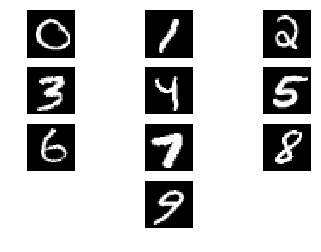

In [468]:
fig = plt.figure()

plt.subplot(431)
plot_img(x_train[:,zeros[0]])

plt.subplot(432)
plot_img(x_train[:,ones[0]])

plt.subplot(433)
plot_img(x_train[:,twos[0]])

plt.subplot(434)
plot_img(x_train[:,threes[0]])

plt.subplot(435)
plot_img(x_train[:,fours[0]])

plt.subplot(436)
plot_img(x_train[:,fives[0]])

plt.subplot(437)
plot_img(x_train[:,sixs[0]])

plt.subplot(438)
plot_img(x_train[:,sevens[0]])

plt.subplot(4,3,9)
plot_img(x_train[:,eights[0]])

plt.subplot(4,3,11)
plot_img(x_train[:,nines[0]]);

plt.axis('off');

fig.savefig('digits.png',bbox_inches='tight',dpi=300)

In [5]:
cd Documents/

/Users/markd/Documents
